# Causal Impact

## Import libraries

In [1]:
#!pip install matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from clickhouse_driver import Client


user_name = 'hardda_student_a.nikitin-8'
pwd = '0ddbfab04207297e7de7f96e697814e152de44e69f9fd4d8d5bdbb6b6107518a'

# creating connection ClickHouse
client = Client(host='clickhouse.lab.karpov.courses', port=9000,
                user=user_name, password=pwd, database='hardda')

# checking connection
result = client.execute("SELECT * FROM hardda.user_dm_events LIMIT 1")

# showing the result
for row in result[0:1]:
    print(row)

(datetime.date(2022, 2, 1), datetime.date(2022, 1, 31), 'android', 'f7411212fd0e2523e126cbfdd3f226c211212', '4beb10e1-aeeb-4c52-acd2-ce1ddbc1fc24b10e1', 22, 11, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0)


## Tasks

### Task 1.

 **Write an SQL query to get `event_date`, `platform`, `cnt_add_to_favorites`, `cnt_view_advertisement`, `cnt_display_phone`, `cr` from `user_dm_events` between 2022-02-01 and 2022-07-15.**

In [4]:
query = '''
SELECT
  event_date,
  platform,
  SUM(cnt_add_to_favorites) AS cnt_fav,
  SUM(cnt_view_advertisement) AS cnt_view,
  SUM(cnt_display_phone) AS cnt_display_phone
FROM
  user_dm_events
WHERE
  event_date BETWEEN '2022-02-01' and '2022-07-15'
GROUP BY
  event_date,
  platform
'''

In [5]:
result = client.execute(query)

In [6]:
len(result)

330

In [7]:
df = pd.DataFrame(result, columns=['event_date', 'platform',
                                   'cnt_fav', 'cnt_view', 'cnt_display_phone'])

df

,event_date,platform,cnt_fav,cnt_view,cnt_display_phone
0,2022-06-02,android,42920,1475717,34164
1,2022-06-28,ios,19621,516822,12483
2,2022-04-18,ios,22804,633205,14099
3,2022-02-19,ios,17286,507738,11343
4,2022-03-30,android,50196,1775406,43112
...,...,...,...,...,...
325,2022-03-27,android,55435,1992935,44901
326,2022-04-23,ios,20434,582899,12763
327,2022-06-23,ios,18700,488290,12370
328,2022-05-30,android,43847,1496826,34888


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_date         330 non-null    object
 1   platform           330 non-null    object
 2   cnt_fav            330 non-null    int64 
 3   cnt_view           330 non-null    int64 
 4   cnt_display_phone  330 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.0+ KB


In [9]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

In [10]:
df['cr'] = df['cnt_fav'] / df['cnt_view']
df = df.sort_values(['event_date', 'platform'])
df.reset_index(drop=True, inplace=True)

In [11]:
df

,event_date,platform,cnt_fav,cnt_view,cnt_display_phone,cr
0,2022-02-01,android,49821,1946760,41451,0.025592
1,2022-02-01,ios,18210,560769,12221,0.032473
2,2022-02-02,android,49712,1936104,41069,0.025676
3,2022-02-02,ios,18113,558109,12456,0.032454
4,2022-02-03,android,49597,1890293,41462,0.026238
...,...,...,...,...,...,...
325,2022-07-13,ios,20192,530259,12482,0.038080
326,2022-07-14,android,42352,1450645,35916,0.029195
327,2022-07-14,ios,20307,526506,13108,0.038569
328,2022-07-15,android,39781,1374144,32537,0.028950


### Task 2.  

**Build a graph of the dynamics of the `cr` metric by platform.** 

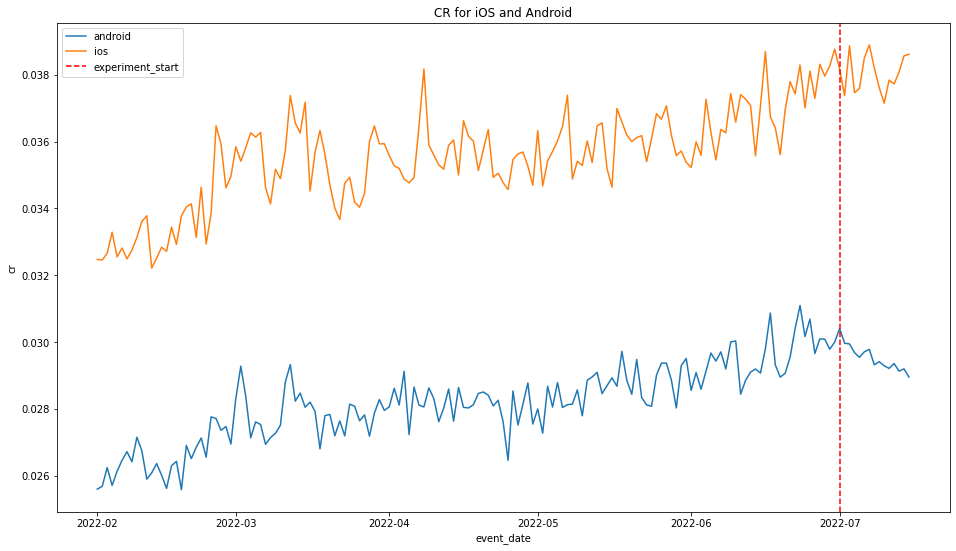

In [12]:
plt.figure(figsize=(16,9))

sns.lineplot(df, x='event_date', y='cr', hue='platform')
plt.axvline(pd.to_datetime('2022-07-01', format='%Y-%m-%d'), color='red', linestyle='dashed', label='experiment_start')
plt.legend()
plt.title('CR for iOS and Android');

### Task 3. 

**Specify the average conversion rate for the target metric in the IOS platform ('cr_ios') by days before the update (less than '2022-07-01').** 

In [13]:
df[(df['platform'] == 'ios') & (df['event_date'] < pd.to_datetime('2022-07-01', format='%Y-%m-%d'))].cr.mean()

0.035519276129212636

### Task 4. 

**Specify the average conversion rate for the target metric in the IOS platform ('cr_ios') by days after the update (>= '2022-07-01').**

In [14]:
df[(df['platform'] == 'ios') & (df['event_date'] >= pd.to_datetime('2022-07-01', format='%Y-%m-%d'))].cr.mean()

0.03804823394818289

### Task 5. 

tbc..